## Import

In [1]:
import numpy as np, pandas as pd
import seaborn as sns, pylab as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dirpath = "/content/drive/MyDrive/Colab Notebooks/SetpointReinforcementLearning/results/"

## Figure 2 - testing on mode


In [4]:
test_file = "test_mode_cartpole.csv"
df_testing = pd.read_csv(dirpath + test_file)
df_testing.head()

,Unnamed: 0,train,tested_on,episode,time,action-1,state-1,state,state_c,action,reward
0,0,modele_-1_classique,0,0,0,0.0,0.032208,0.031698,0.0,1,1.0
1,1,modele_-1_classique,0,0,1,1.0,0.027067,0.032208,0.0,1,1.0
2,2,modele_-1_classique,0,0,2,1.0,0.016279,0.027067,0.0,1,1.0
3,3,modele_-1_classique,0,0,3,1.0,-0.000189,0.016279,0.0,1,1.0
4,4,modele_-1_classique,0,0,4,1.0,-0.022407,-0.000189,0.0,0,1.0


In [5]:
# columns
time = "time"
columns = ["state",	"state_c"]

### Variation à la consigne

pas tres interessant..

In [6]:
"""
for _, group in df_testing.groupby("tested_on") :
  # update
  group["var"] = group["state_c"] - group["state"]
  # plot
  g = sns.FacetGrid(group, col="train", col_wrap=3)
  g.map_dataframe(sns.lineplot, x="time", y="var")
  g.add_legend()
  #plt.savefig(dirpath+"figure_test_cartpole.svg")
  plt.show()
"""

'\nfor _, group in df_testing.groupby("tested_on") :\n  # update\n  group["var"] = group["state_c"] - group["state"]\n  # plot\n  g = sns.FacetGrid(group, col="train", col_wrap=3)\n  g.map_dataframe(sns.lineplot, x="time", y="var")\n  g.add_legend()\n  #plt.savefig(dirpath+"figure_test_cartpole.svg")\n  plt.show()\n'

### Boxplot

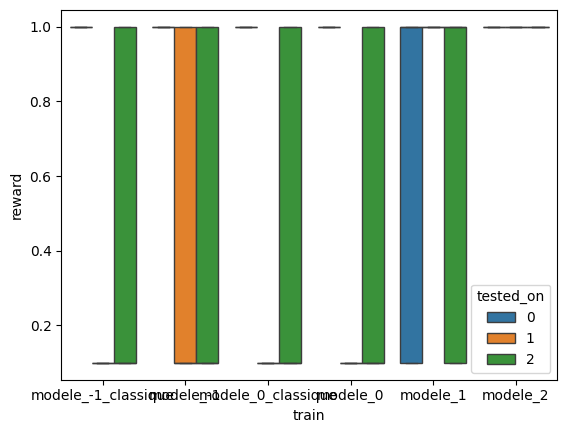

In [23]:
#sns.pointplot(data=df_testing["reward"], color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
sns.boxplot(x = df_testing['train'], y = df_testing['reward'], hue = df_testing['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
#plt.ylim(0,1)
plt.show()

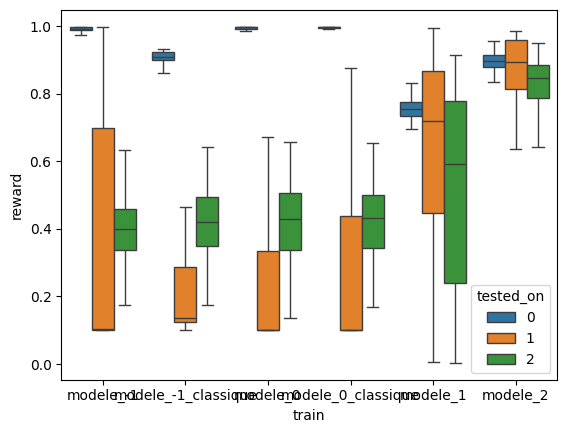

In [24]:
choice_clm = ["train","tested_on","episode","reward"]
gb = df_testing[choice_clm].groupby(["train","tested_on","episode"])
df_sum = df_testing[choice_clm].groupby(["train","tested_on","episode"], as_index=False)['reward'].sum()
sns.boxplot(x = df_sum['train'], y = df_sum['reward'].divide(499), hue = df_sum['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
plt.show()

In [ ]:
for name, gb in df_sum.groupby(["train","tested_on"], as_index=False):
  print(gb['reward'].describe())

### Space Space (mode 2)

https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins

In [29]:
df_mode2 = df_testing[df_testing["tested_on"]==2][["train","state","state_c","action"]]
df_mode2.head()

,train,state,state_c,action
99600,modele_-1_classique,-0.036269,-0.102027,1
99601,modele_-1_classique,-0.036086,-0.102136,1
99602,modele_-1_classique,-0.041982,-0.102274,1
99603,modele_-1_classique,-0.053954,-0.102446,0
99604,modele_-1_classique,-0.072039,-0.102656,0


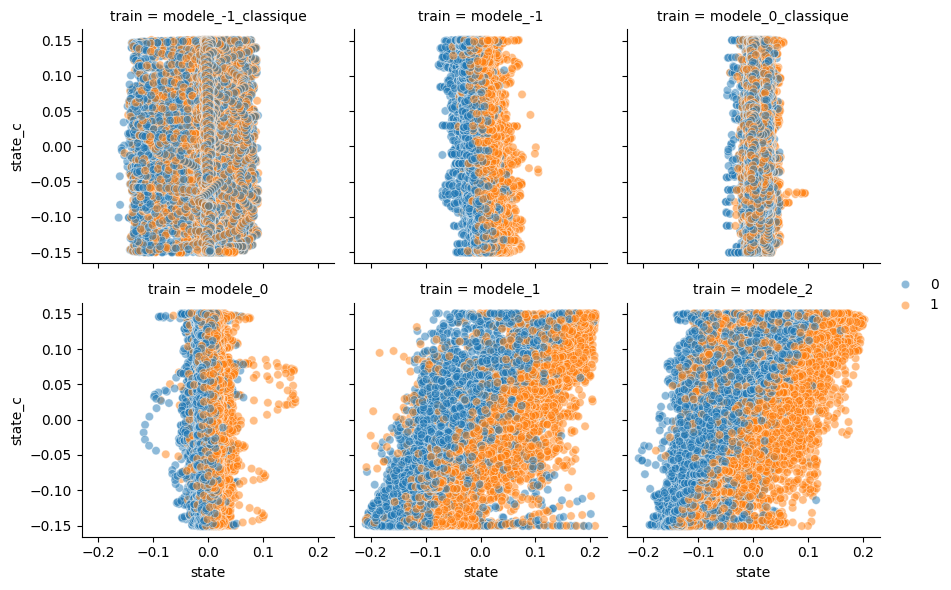

In [41]:
g = sns.FacetGrid(df_mode2, col="train", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="state", y="state_c", hue="action", alpha=0.5)
#g.map_dataframe(sns.kdeplot, x="state", y="state_c", hue="action", fill=True, common_norm=False, levels=3, alpha=0.9, linewidth=0,)
#g.map_dataframe(sns.histplot, x="state", y="state_c", hue="action", fill=True)
g.add_legend()
plt.show()